## Вводная часть

Мои партнеры и я решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой, поэтому есть необходимость обратиться к инвесторам

**Цель исследования:**

Определить насколько данный проект будет успешный, чтобы потенциальные инвесторы могли понять стоит ли им вкладываться в наше кофе 
<br><br>
**Ход исследования:**

Данное исследование будет разбито на несколько частей:
- Загрузить данные о заведениях общественного питания Москвы, убедившись, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости стоит обработать их;
<br><br>
- Проанализировать предложенные данные с целью дать общий вывод и рекомендации о виде заведения, количестве посадочных мест и районе расположения. Также дать комментарии о возможности развития сети и в чем она будет заключаться
<br><br>
- В конце проекта необходимо подготовить презентацию исследования для инвесторов

## Загрузка данных и подготовка их к анализу

*Загрузим необходимые библиотеки:*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px

<br>*Загрузим необходимые данные, выведим их на экран:*

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

display (rest_data.head(10))
rest_data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


**Предварительные результаты после обзора данных:**
- Дана таблица, состоящая из 6 столбов и 15366 строк;
- Тип данных: *int64(2)*, *object(4)*;
- Размер данных: 720.4+ KB;
- Название и описание соддержания столбцов:
 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

 
**Необходимая предобработка заключается в следующем:**
- Проверить таблицу на пропуски и на наличие дубликатов;
- Откорректируем записи в столбце `chain` для большего понимания;
- Найдем аномалии в столбце `number` и избавимся от них

**Проверим файлы на наличие дубликатов и пропусков по столбцам:**

In [3]:
print('Количество дубликатов:')
print(rest_data.duplicated().sum())

print('Количество пропусков по столбцам:')
print(rest_data.isna().sum())

Количество дубликатов:
0
Количество пропусков по столбцам:
id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


<br>**Произведем проверку на неявные дубликаты**

*Осуществим проверку на дубликаты, исключив из подсчета столбец* `id`, *т.к. могли делать подсчеты независимо несколько человек, и интерпретировать показатели в других столбцах они могли по разному:*

In [4]:
rest_x = rest_data[rest_data.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'])]

rest_x

,id,object_name,chain,object_type,address,number
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
...,...,...,...,...,...,...
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


<br>*Получилось выявить 82 неявыных дубликата, которые могли исказить последующие расчеты* 

*Выпишем индексы с таблицы выше с дубликатами и удалим их из исходной таблицы:*

In [5]:
rest_x1 = rest_x.index

rest_data = rest_data.drop(rest_data.index[rest_x1])
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


<br>**Для дальнейшей визуализации и понимания графиков заменим слова "да" и "нет" на "сеть" и "не сеть" в столбце `chain` соответственно:**

In [6]:
rest_data['chain'] = rest_data['chain'].str.replace("да", "сеть")
rest_data['chain'] = rest_data['chain'].str.replace("нет", "не сеть")

rest_data['chain'].unique()

array(['не сеть', 'сеть'], dtype=object)

<br> **Так как кофе у нас планируется небольшое, то посадочных мест должно быть немного. Найдем "аномально" большое (и заодно небольшое) количество посадочных мест и избавимся от таких заведений**

*Посчитаем 10-й и 99-й перцентили количество посадочных мест:*

In [7]:
print(np.percentile(rest_data['number'], [10, 99]))
print(rest_data[rest_data['number']>=300].shape[0])

[  0. 300.]
220


*10% записей не имеют количество посадочных мест, и 1% - с количеством посадочных мест больше 300*

*Избавимся от всех заведений в таблице, где количество посадочных мест больше 300 (99 перцентиль):*

In [8]:
rest_data = rest_data[rest_data['number']<300]

print(rest_data[rest_data['number']>=300].shape[0])

0


*Произведем поиск значений, где количество посадочных мест равно нулю:*

In [9]:
zero = rest_data[rest_data['number'] == 0]
display (zero.head(), zero.shape[0])

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,не сеть,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,не сеть,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,не сеть,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",не сеть,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",не сеть,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0


1589

*Так как нет возможности определить истинную причину почему количество посадочных мест может быть равно "0" по каждому заведению, то принимаем единственную возможную, которая гласит, что в этих заведениях производят еду только на вынос либо через доставку*

<br>**Подведем итог первой части проекта:**
- открыли файлы необохдимые для анализа и изучили их содержание;
- преоборазовали данные в столбце `chain` в необоходимый вид;
- проверили файлы на наличие дубликатов и пропусков - удалили столбцы с неявными дубликатами;
- удалили "аномалии" из столбца `number`

**Результат проделанной работы: данные готовы для дальнейшего анализа!**

## Анализ данных

### Исследование соотношения видов объектов общественного питания по количеству

*Определим количество объектов общественного питания по его виду:*

In [10]:
object_type = rest_data['object_type'].value_counts().to_frame()
object_type['ratio'] = object_type['object_type'] / object_type['object_type'].sum()
object_type = object_type.sort_values(by='ratio', ascending=False)

object_type

,object_type,ratio
кафе,6061,0.402350
столовая,2460,0.163303
ресторан,2204,0.146309
предприятие быстрого обслуживания,1894,0.125730
бар,854,0.056691
буфет,574,0.038104
кафетерий,395,0.026221
закусочная,349,0.023168
магазин (отдел кулинарии),273,0.018123


<br>*Построим гистограмму распределения по виду объектов общественного питания*:

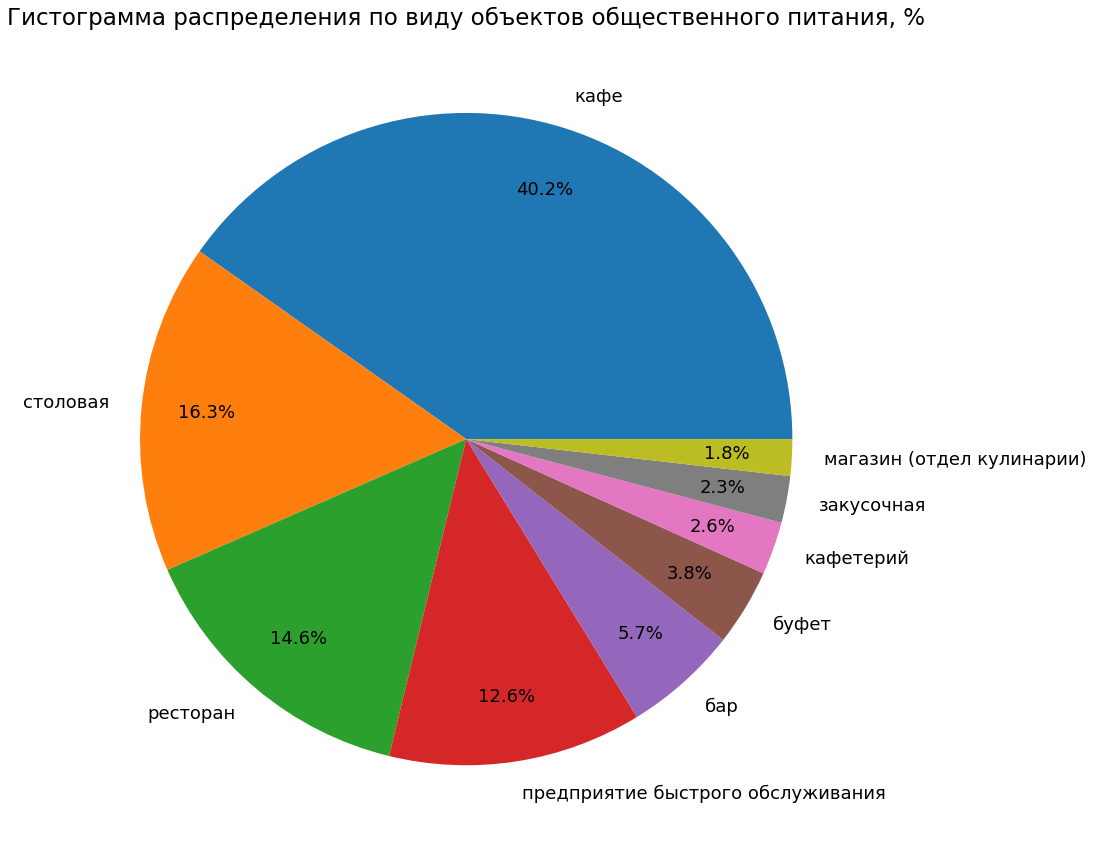

In [11]:
object_type.plot(y='object_type', kind='pie', normalize=True, figsize=(15,15), legend=False, fontsize=18, autopct='%1.1f%%',
                 pctdistance=0.8, radius=1)
plt.title('Гистограмма распределения по виду объектов общественного питания, %', fontsize=23)

plt.axis('off')

plt.show()

**Подведем итог второй части проекта:**
- судя по выведенной информации, самый популярный вид заведения - кафе (40%), затем идут столовая (16%), ресторан (15%) и предприятие быстрого питания (13%);
- Вид объекта общественного питания под названием "кафе" пользуется самой большой популярностью у москвичей. Поэтому можно попробовать влезть в данный сегмент, но не стоит забывать, что это также высокие риски, т.к. у нас могут возникнуть много конкурентов. Необходимо в дальнейшем правильно подобрать район, где будем открываться, чтобы снизить возможные риски по началу, а когда раскрутимся, возможно добиться высокой выручки при низких затратах (например, из-за отсутствия зарплат, отпусков болезней, времени на перерывы и пр. у сотрудников-роботов)

## Исследование соотношения сетевых и несетевых заведений по количеству

*Определим количество сетевых/несетевых ресторанов:*

In [12]:
rest_data1 = rest_data.copy(deep=True)

 # для дальнейшей работы с гистограммой поменяем значения в столбце 'chain' на более полное значение с дополнительным переносом:
rest_data1['chain'] = rest_data1['chain'].str.replace("сеть", "сетевое\nзаведение")
rest_data1['chain'] = rest_data1['chain'].str.replace("не сеть", "несетевое\nзаведение")


rest_data1 = rest_data1.groupby('chain')[['chain']].count()


rest_data1

,chain
chain,
не сетевое\nзаведение,12125
сетевое\nзаведение,2939


<br>*Построим гистограмму распределения по типу сетевой/несетвой ресторан*

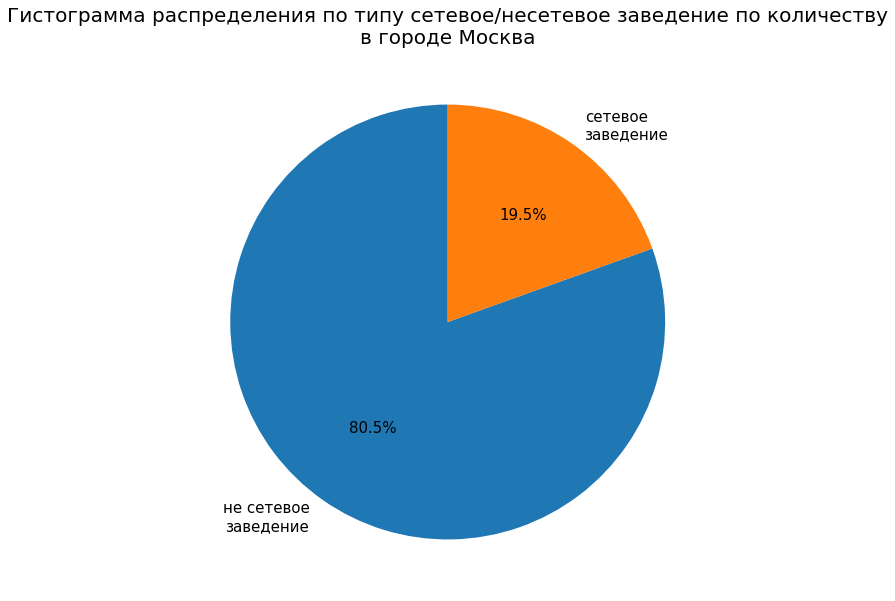

In [13]:
rest_data1.plot(y='chain', kind='pie', normalize=True, figsize=(10,10), legend=False, fontsize=15,  autopct='%1.1f%%',
                 pctdistance=0.6, radius=1, startangle=90)
plt.title('Гистограмма распределения по типу сетевое/несетевое заведение по количеству\nв городе Москва', fontsize=20)

plt.axis('off')

plt.show()

## Для какого вида объекта общественного питания характерно сетевое распространение?

*Определим количество объектов общественного питания в зависимости от того сетевое или несетевое это заведение:*

In [14]:
object_type_chain = rest_data.groupby(['object_type', 'chain'])['chain'].count().to_frame()
object_type_chain

chain
object_type                       chain         
бар                               не сеть    817
                                  сеть        37
буфет                             не сеть    563
                                  сеть        11
закусочная                        не сеть    293
                                  сеть        56
кафе                              не сеть   4669
                                  сеть      1392
кафетерий                         не сеть    343
                                  сеть        52
магазин (отдел кулинарии)         не сеть    195
                                  сеть        78
предприятие быстрого обслуживания не сеть   1110
                                  сеть       784
ресторан                          не сеть   1678
                                  сеть       526
столовая                          не сеть   2457
                                  сеть         3

<br>*Построим диаграмму, показывающую количество объектов общественного питания по его типу*:

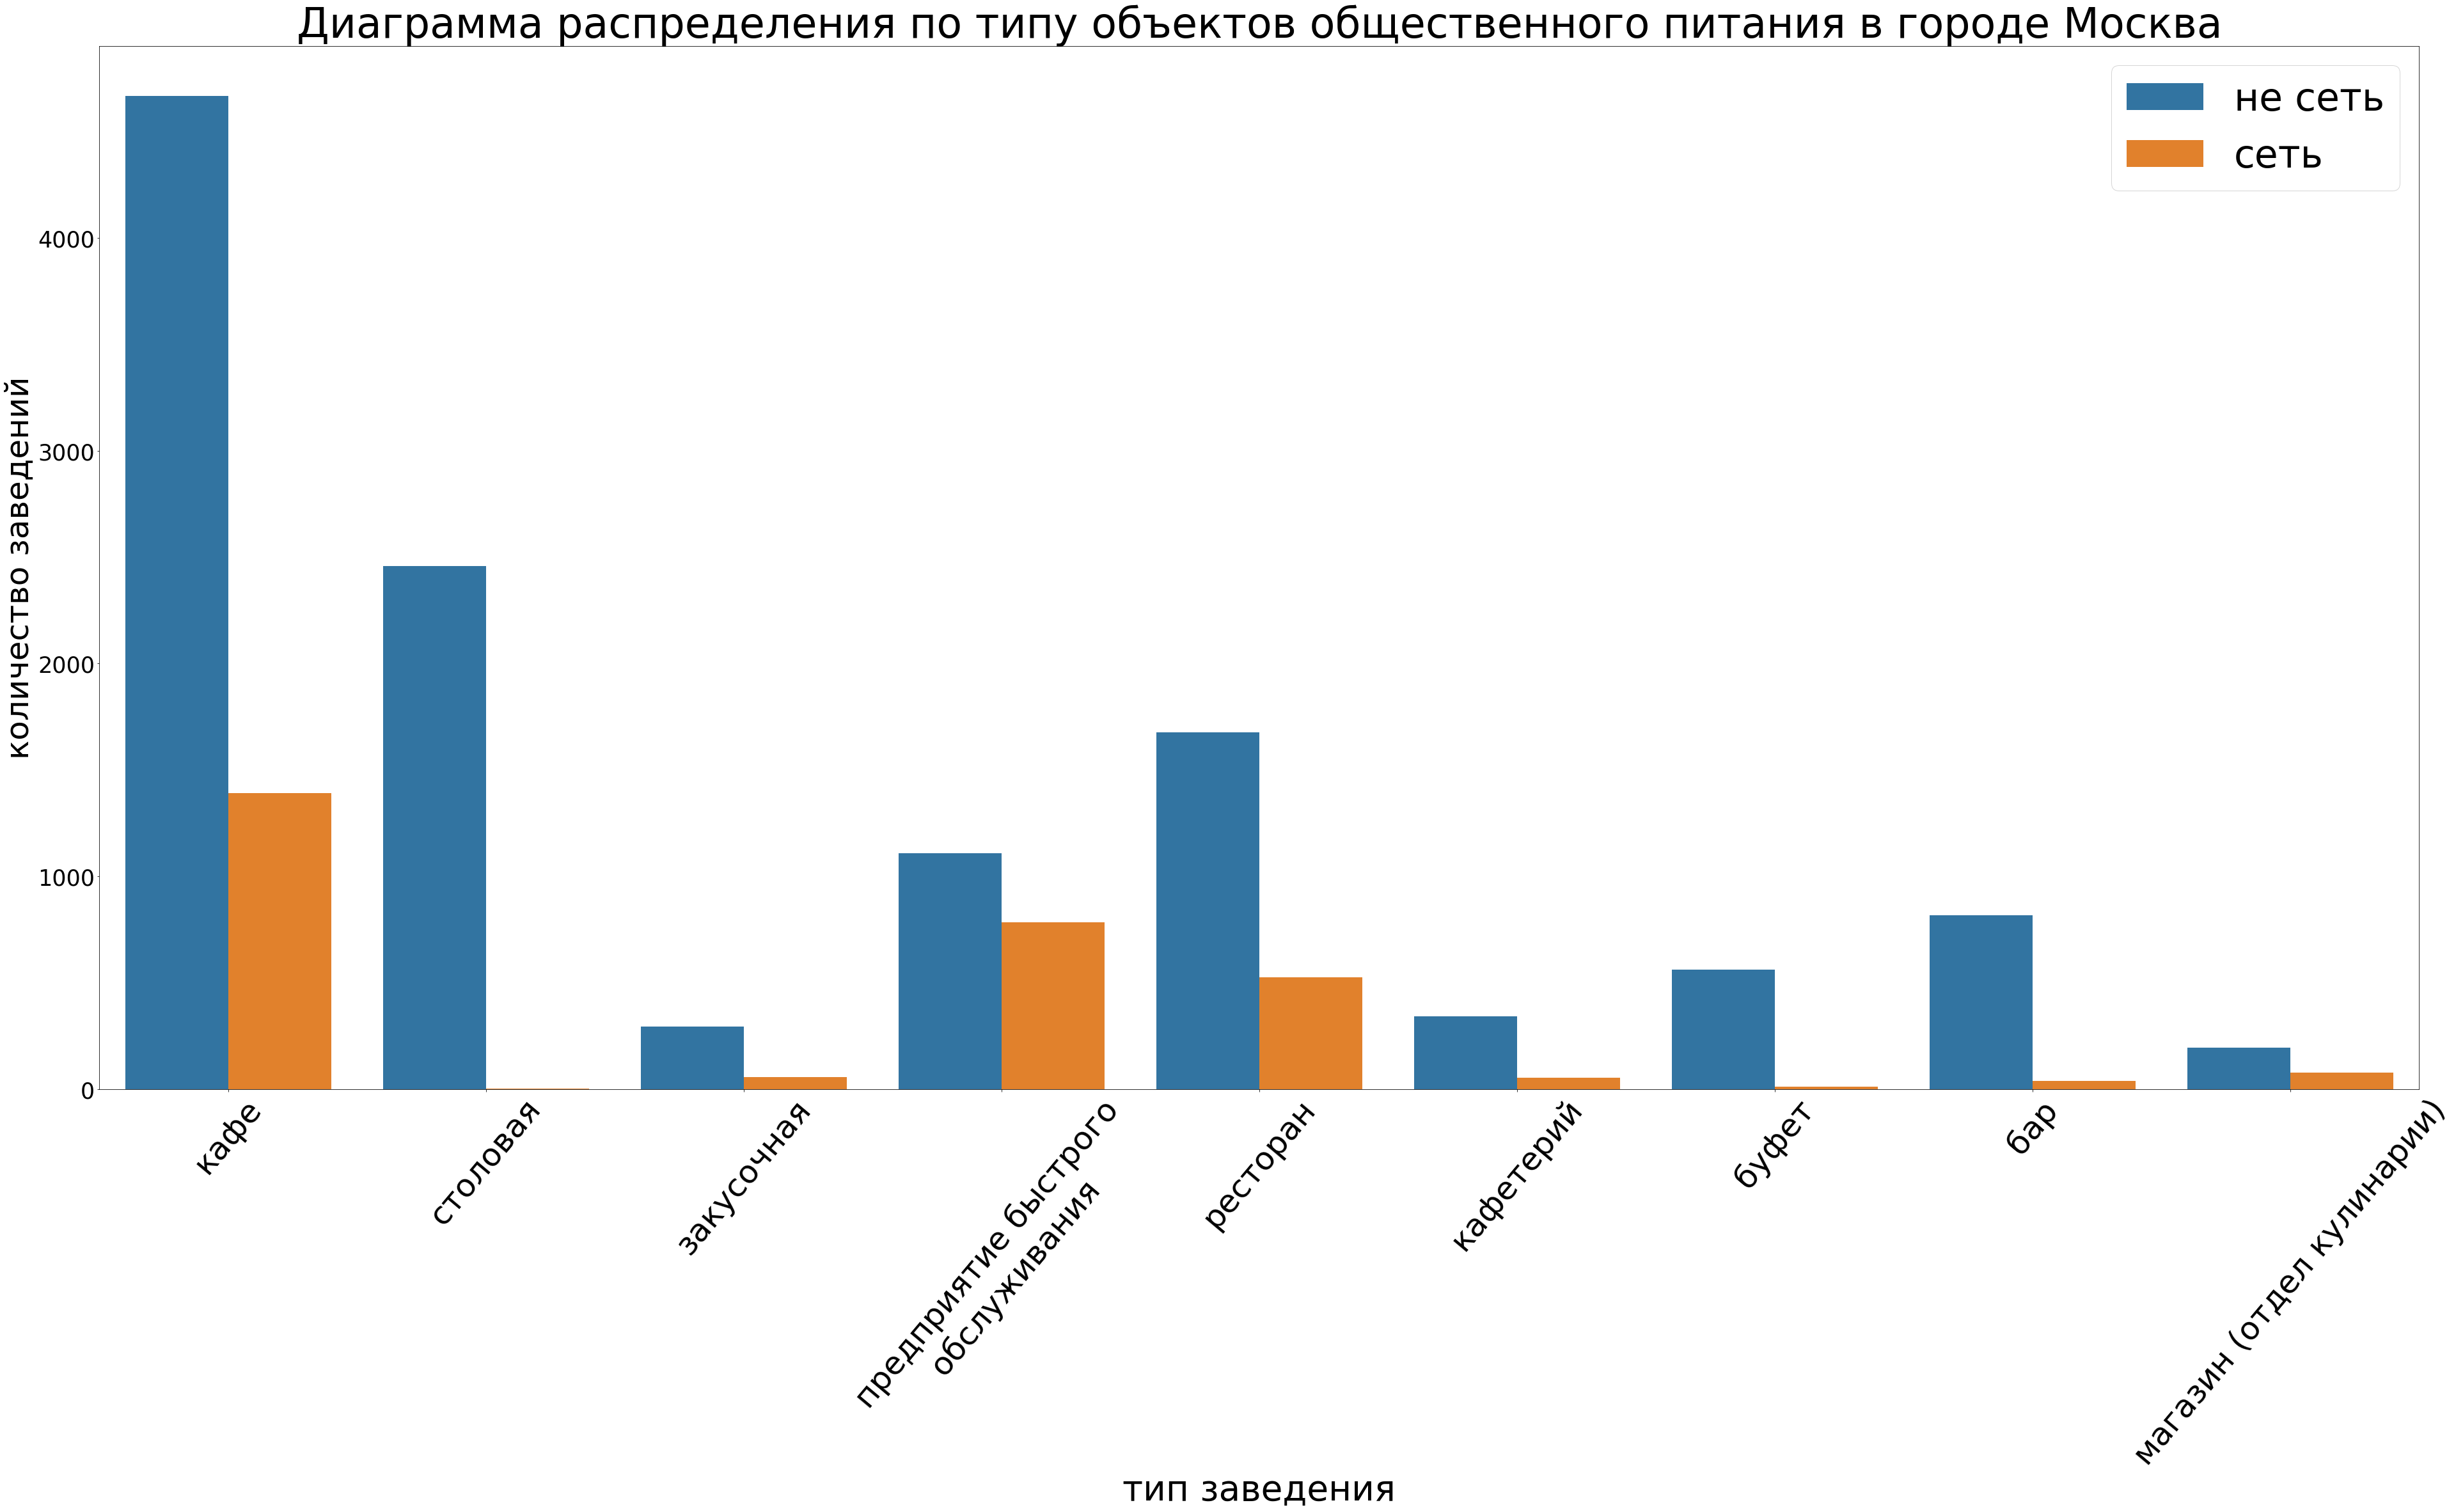

In [15]:
plt.figure(figsize=(65,30))

rest_data2 = rest_data.copy(deep=True)
rest_data2['object_type'] = rest_data2['object_type'].str.replace("предприятие быстрого обслуживания","предприятие быстрого\nобслуживания")


sns.barplot(y="number", x='object_type', hue='chain', data=rest_data2, estimator=np.size)

plt.ylabel("количество заведений",fontsize = 50)
plt.xlabel("тип заведения",fontsize = 55)

plt.title('Диаграмма распределения по типу объектов общественного питания в городе Москва', fontsize=65)

plt.rcParams.update({'font.size': 60})
plt.legend(loc='upper right')

plt.yticks(fontsize = 35)
plt.xticks(fontsize = 50, rotation = 50)

plt.show()

**Подведем итог четвертой части проекта:** все виды заведений представлены в основном несетевыми заведениями, сетевой рынок представлен крупно лишь в сегменте "кафе" и "быстрого питания"


**Основные выводы из получившейся информации:**

- Как говорилось раннее, основной акцент ставится на текущие дела в заведениях под названием "кафе", где отталкиваемся сначала в статистику по несетевым заведениям (т.е. до нашего предполагаемого расширения или "краткосрочное" планирование), а потом в сетевые (после начала расширения или "долгосрочное" планирование).


- Самый представленный вид заведения - кафе, где каждое заведение является нашим потенциальным конкурентом. Данный вид - самый представленный в городе Москва


- Как и по всем видам заведений общественного питания, так и в сегменте под названием "кафе" картина примерно одинаковая: основная часть помещений представлена несетевыми ресторанами, но где-то больше (столовая), а где-то меньше (предприятия быстрого обслуживания);


По началу конкуренцию с несетевыми кофе можно будет преодолеть при помощи нашего ноу-хау, в котором главная фишка нашего кафе - роботы. Ради такого к нам будут съезжаться люди из всей Москвы и других городов. А когда уже начнем расширяться - то на волне нашей уникальности, а также при большей доступности к технологиям робототехники и низких затратах на обслуживающий персонал относительно других заведений можно будет легко захватить рынок общественного питания Москвы сетью наших кафе

## Что характерно для сетевых заведений?

*Мы уже определились с тем, что для сетевых заведений нехарактерно большое количество помещений относительно несетевых* 
<br><br>


*Теперь определимся сколько в среднем посадочных мест в сетевых заведениях, разбив их по названиям сетей*:

In [16]:
name_chain  = rest_data[rest_data['chain'] == 'сеть']

name_chain = name_chain.groupby('object_name')[['number']].agg({'number': ['count', 'mean']}).reset_index()

name_chain.columns = name_chain.columns.droplevel(0)
name_chain = name_chain.sort_values(by='count', ascending=False)

name_chain = name_chain[name_chain['count']>1] # Сетевым заедением будем считать то, где помещений больше чем 1, заодно
# избавимся от возможных скрытых аномалий


name_chain

,,count,mean
30,KFC,154,53.103896
698,Шоколадница,141,56.170213
126,Бургер Кинг,122,45.016393
416,Макдоналдс,120,78.858333
194,Домино'с Пицца,86,18.209302
...,...,...,...
152,ГРАБЛИ,2,85.000000
378,Кофетун,2,30.000000
149,ВьетКафе,2,59.000000
595,СТАРИНА МЮЛЛЕР Старина Миллер,2,215.000000


<br>*Определим медианное значение (или 50-перцентиль) количества заведений и посадочных мест, чтобы в дальнейшем каждому заведению дать критерий:*

In [17]:
print(np.percentile(name_chain['count'], [50]))
print(np.percentile(name_chain['mean'], [50]))

[3.]
[44.56666667]


<br> *Дадим критерии каждому наименованию сети рестаранов в зависимости от количества заведений и посадочных мест*:

In [18]:
# количество заведений одной сети, которое больше 50-перцентиля, дадим определение как "много заведений" и наоборот:
name_chain['description1'] = np.where(name_chain['count'] > 3, 'много заведений', 'мало заведений') 

# среднее количество мест одной сети, которое больше 50-перцентиля, дадим определение как "много посадочных мест" и наоборот:
name_chain['description2'] = np.where(name_chain['mean'] > 44.57, 'много посадочных мест', 'мало посадочных мест')

# объединим два столбца в один:
name_chain['description'] = name_chain["description1"].astype(str) + ",\n " + name_chain["description2"].astype(str).str.zfill(6)

name_chain = name_chain.drop(['description1', 'description2'], axis=1)
name_chain

,,count,mean,description
30,KFC,154,53.103896,"много заведений,\n много посадочных мест"
698,Шоколадница,141,56.170213,"много заведений,\n много посадочных мест"
126,Бургер Кинг,122,45.016393,"много заведений,\n много посадочных мест"
416,Макдоналдс,120,78.858333,"много заведений,\n много посадочных мест"
194,Домино'с Пицца,86,18.209302,"много заведений,\n мало посадочных мест"
...,...,...,...,...
152,ГРАБЛИ,2,85.000000,"мало заведений,\n много посадочных мест"
378,Кофетун,2,30.000000,"мало заведений,\n мало посадочных мест"
149,ВьетКафе,2,59.000000,"мало заведений,\n много посадочных мест"
595,СТАРИНА МЮЛЛЕР Старина Миллер,2,215.000000,"мало заведений,\n много посадочных мест"


<br> *Определим соотношение сетевых заведений по раннее выведенному описанию:*

In [19]:
name_chain_count = name_chain.groupby('description').size().sort_values(ascending=False)

name_chain_count

description
мало заведений,\n много посадочных мест     75
мало заведений,\n мало посадочных мест      69
много заведений,\n мало посадочных мест     68
много заведений,\n много посадочных мест    61
dtype: int64

<br> *Визуализируем таблицу выше при помощи круговой диаграммы, в котором определим соотношение сетевых заведений согласно их раннее полученному описанию*:

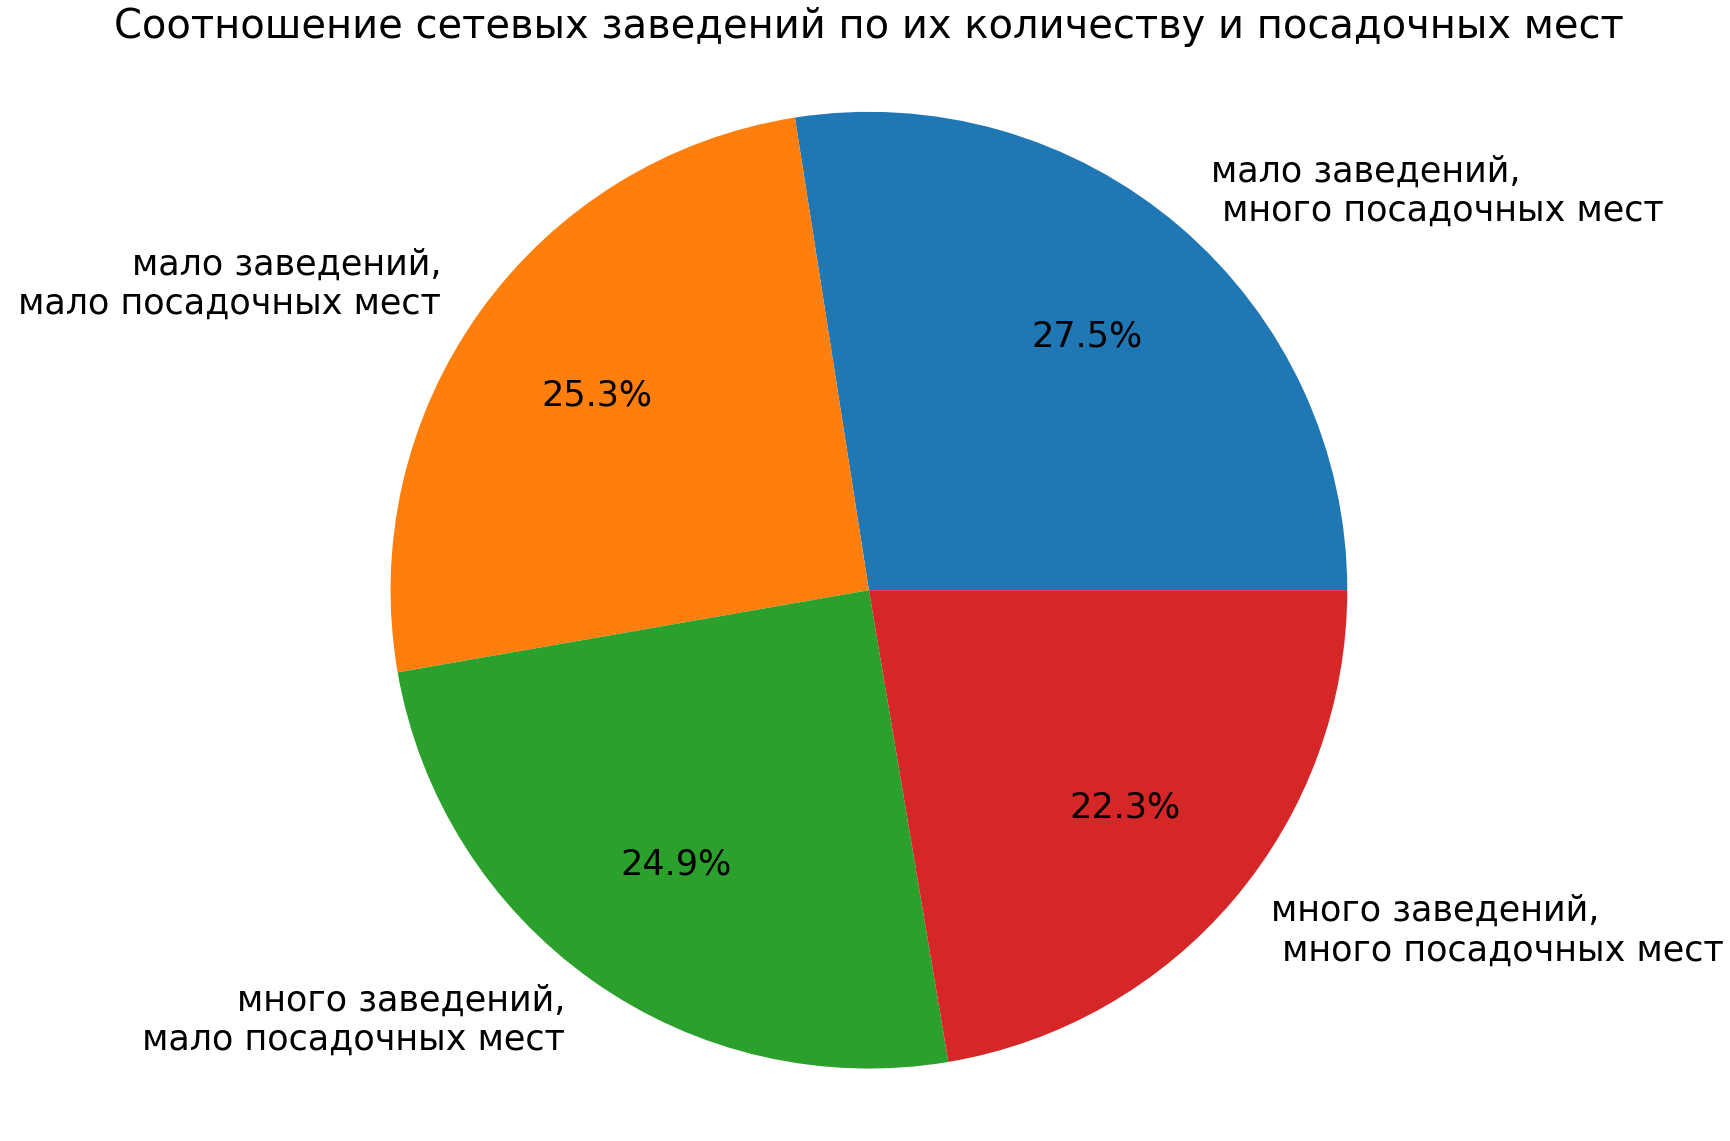

In [20]:
name_chain_count.plot(y=0, kind='pie', normalize=True, figsize=(20,20), legend=False, fontsize=35,  autopct='%1.1f%%',
                 pctdistance=0.7, radius=1.1)
plt.title('Соотношение сетевых заведений по их количеству и посадочных мест', fontsize=40)

plt.axis('off')

plt.show()

<br>*Дополним диаграмму выше диаграммой рассеяния*:

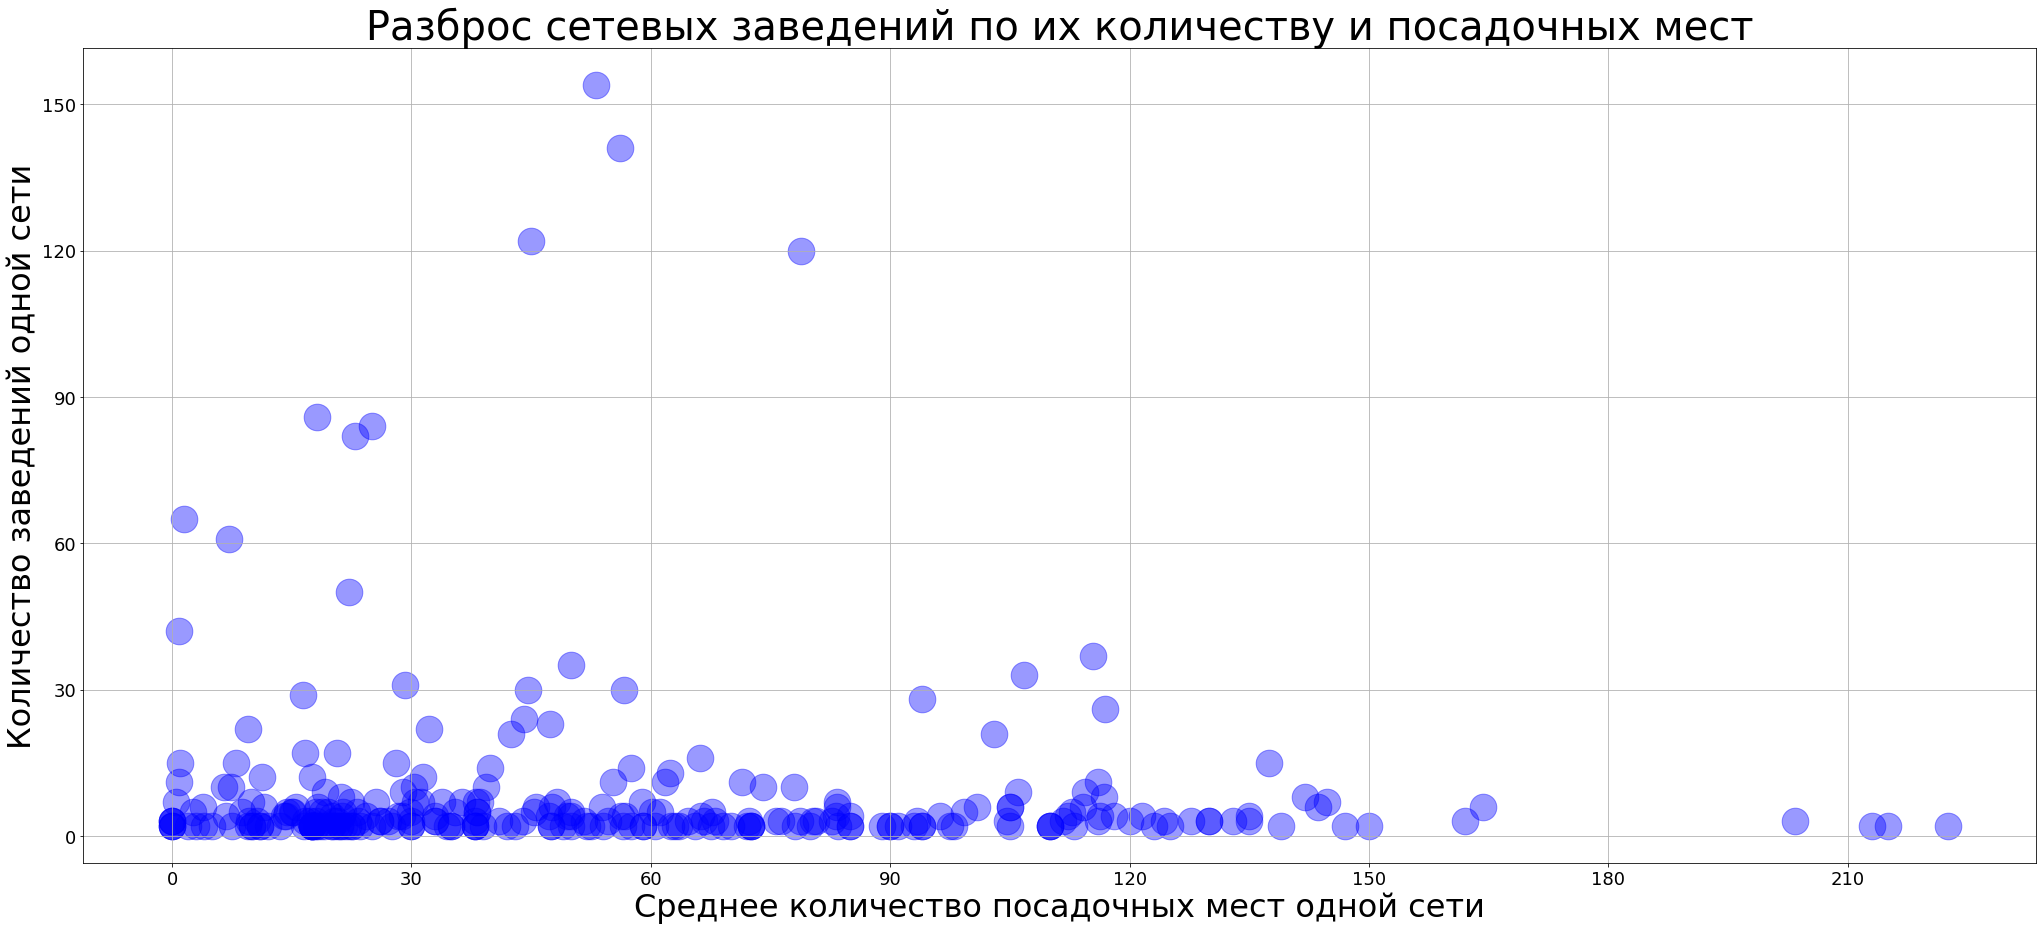

In [21]:
y = name_chain['count']
x = name_chain['mean']


fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', alpha=0.4, s = 710)

fig.set_figwidth(35)     #  ширина и
fig.set_figheight(15)    #  высота "Figure"

plt.ylabel("Количество заведений одной сети",fontsize = 32)
plt.xlabel("Среднее количество посадочных мест одной сети",fontsize = 32)

plt.title('Разброс сетевых заведений по их количеству и посадочных мест', fontsize=40)

plt.yticks([0, 30, 60, 90, 120, 150], size=18)
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210], size=18)

ax.yaxis.grid(True, "major")
ax.xaxis.grid(True, "major")


plt.show()

<br> *По расчетам и диаграммам выше стало очевидно, что нет особого различия между сетевыми заведениями по соотношению количество посадочных мест и количество заведений одной сети*

*Поэтому, чтобы понимать специфику сегмента, в каком напрпалении нам необходимо развиваться первоначально, стоит рассмотреть заведения с критерием "мало заведений, мало посадочных мест"*:

In [22]:
robot_chain = name_chain[name_chain['description'] == 'мало заведений,\n мало посадочных мест']

print('среднее значение посадочных мест в заведениях из сегмента "мало заведений, мало посадочных мест":',
      robot_chain['mean'].mean())

среднее значение посадочных мест в заведениях из сегмента "мало заведений, мало посадочных мест": 20.256038647342994


<br>**Подведем итог пятой части проекта:** нет особого различия между сетевыми заведениями по соотношению количество посадочных мест и количество заведений одной сети

В случае дальнейшего нашего расширения стоит ориентироваться на среднее значение посадочных мест равным примерно 20 штук (в случае если в ближайшей перспективе будем и дальше открывать кафе небольших размеров). Более точное количество посадочных мест постараемся выяснить в ходе дальнейшего исследования

## Для каждого вида объекта общественного питания опишем среднее количество посадочных мест

*Определим среднее количество посадочных мест по типу заведения:*

In [23]:
object_type_number = rest_data.groupby(['object_type', 'chain'])['number'].mean().to_frame()
object_type_number

number
object_type                       chain              
бар                               не сеть   41.075887
                                  сеть      53.027027
буфет                             не сеть   50.907638
                                  сеть      12.727273
закусочная                        не сеть    6.573379
                                  сеть      14.375000
кафе                              не сеть   37.092739
                                  сеть      46.456897
кафетерий                         не сеть    8.717201
                                  сеть      12.269231
магазин (отдел кулинарии)         не сеть    4.353846
                                  сеть       8.679487
предприятие быстрого обслуживания не сеть    6.956757
                                  сеть      38.280612
ресторан                          не сеть   81.789631
                                  сеть      92.186312
столовая                          не сеть  119.279609
                                  сеть     112.333333

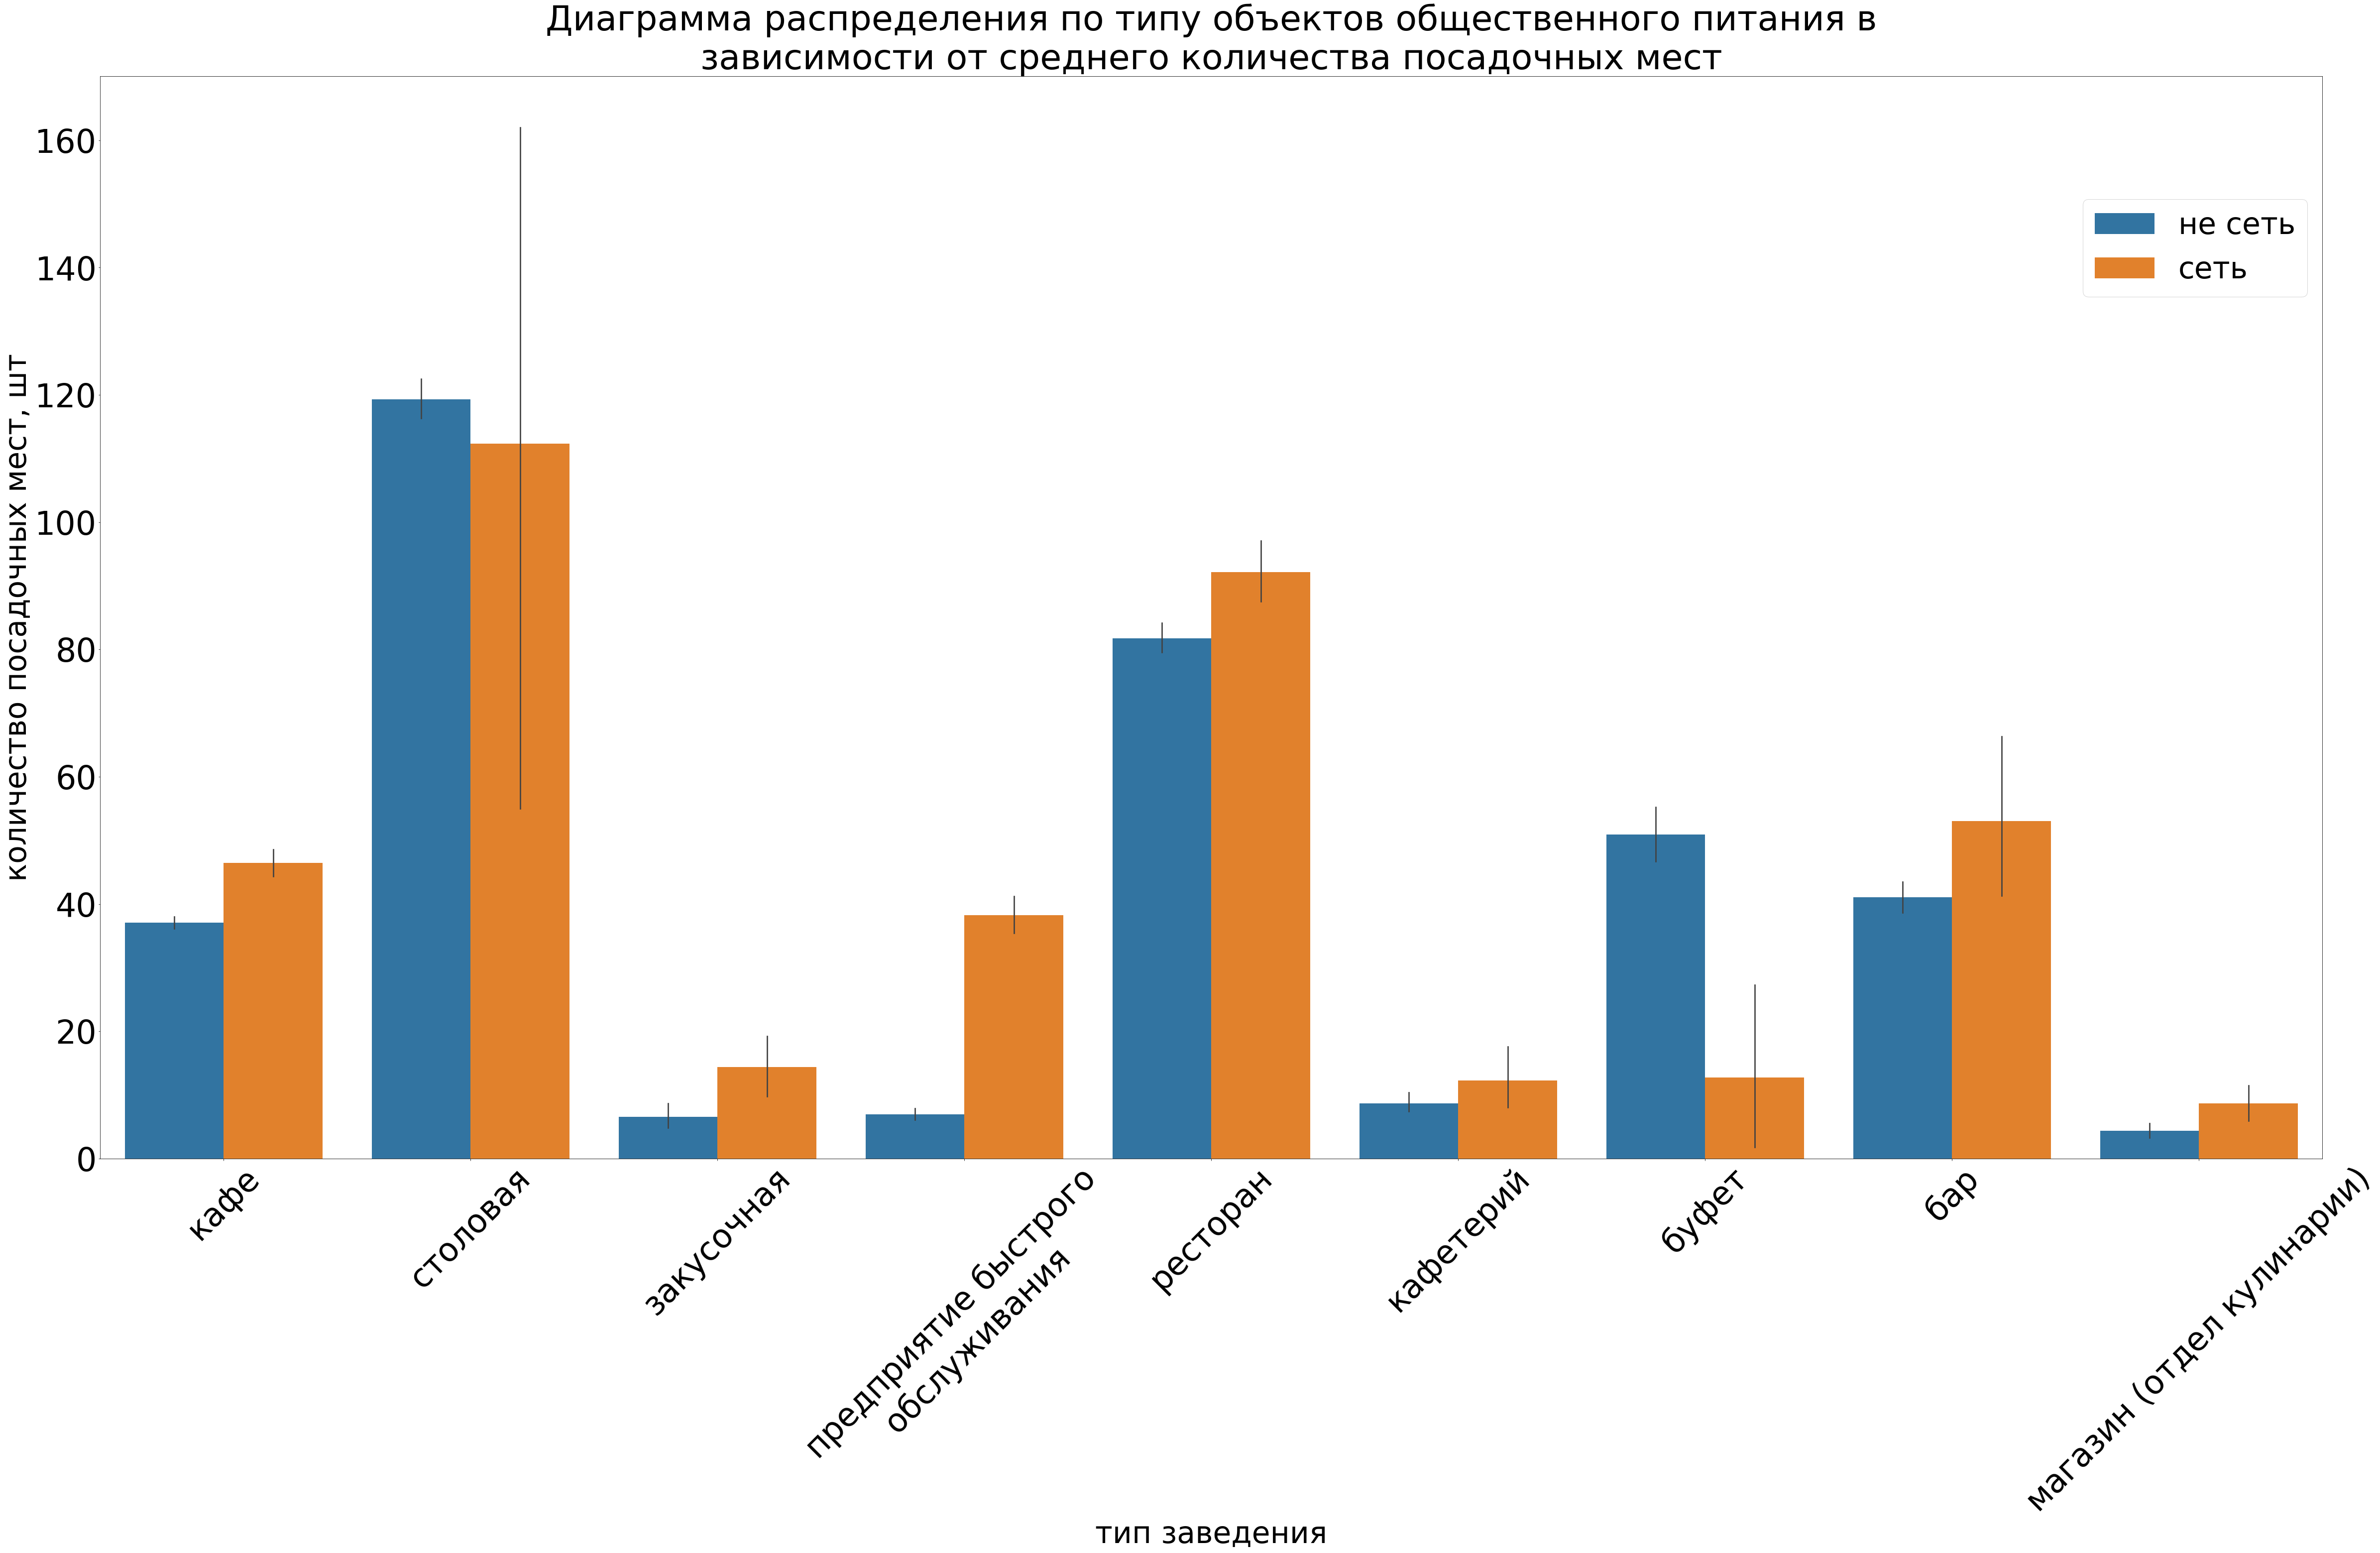

In [24]:
plt.figure(figsize=(80,40))

sns.barplot(y="number", x='object_type', hue='chain', data=rest_data2, estimator=np.mean)

plt.ylabel("количество посадочных мест, шт",fontsize = 60)
plt.xlabel("тип заведения",fontsize = 60)

plt.legend(loc=2, prop={'size': 60}) 
plt.legend(bbox_to_anchor=(1,0.9))

plt.title('Диаграмма распределения по типу объектов общественного питания в\nзависимости от среднего количества посадочных мест',
          fontsize=70)

plt.yticks(fontsize = 65)
plt.xticks(fontsize = 65, rotation = 45)

plt.show()

<br> *Дополнительно к предыдущему графику построим диаграмму размаха количества посадочных мест от типа заведения:*

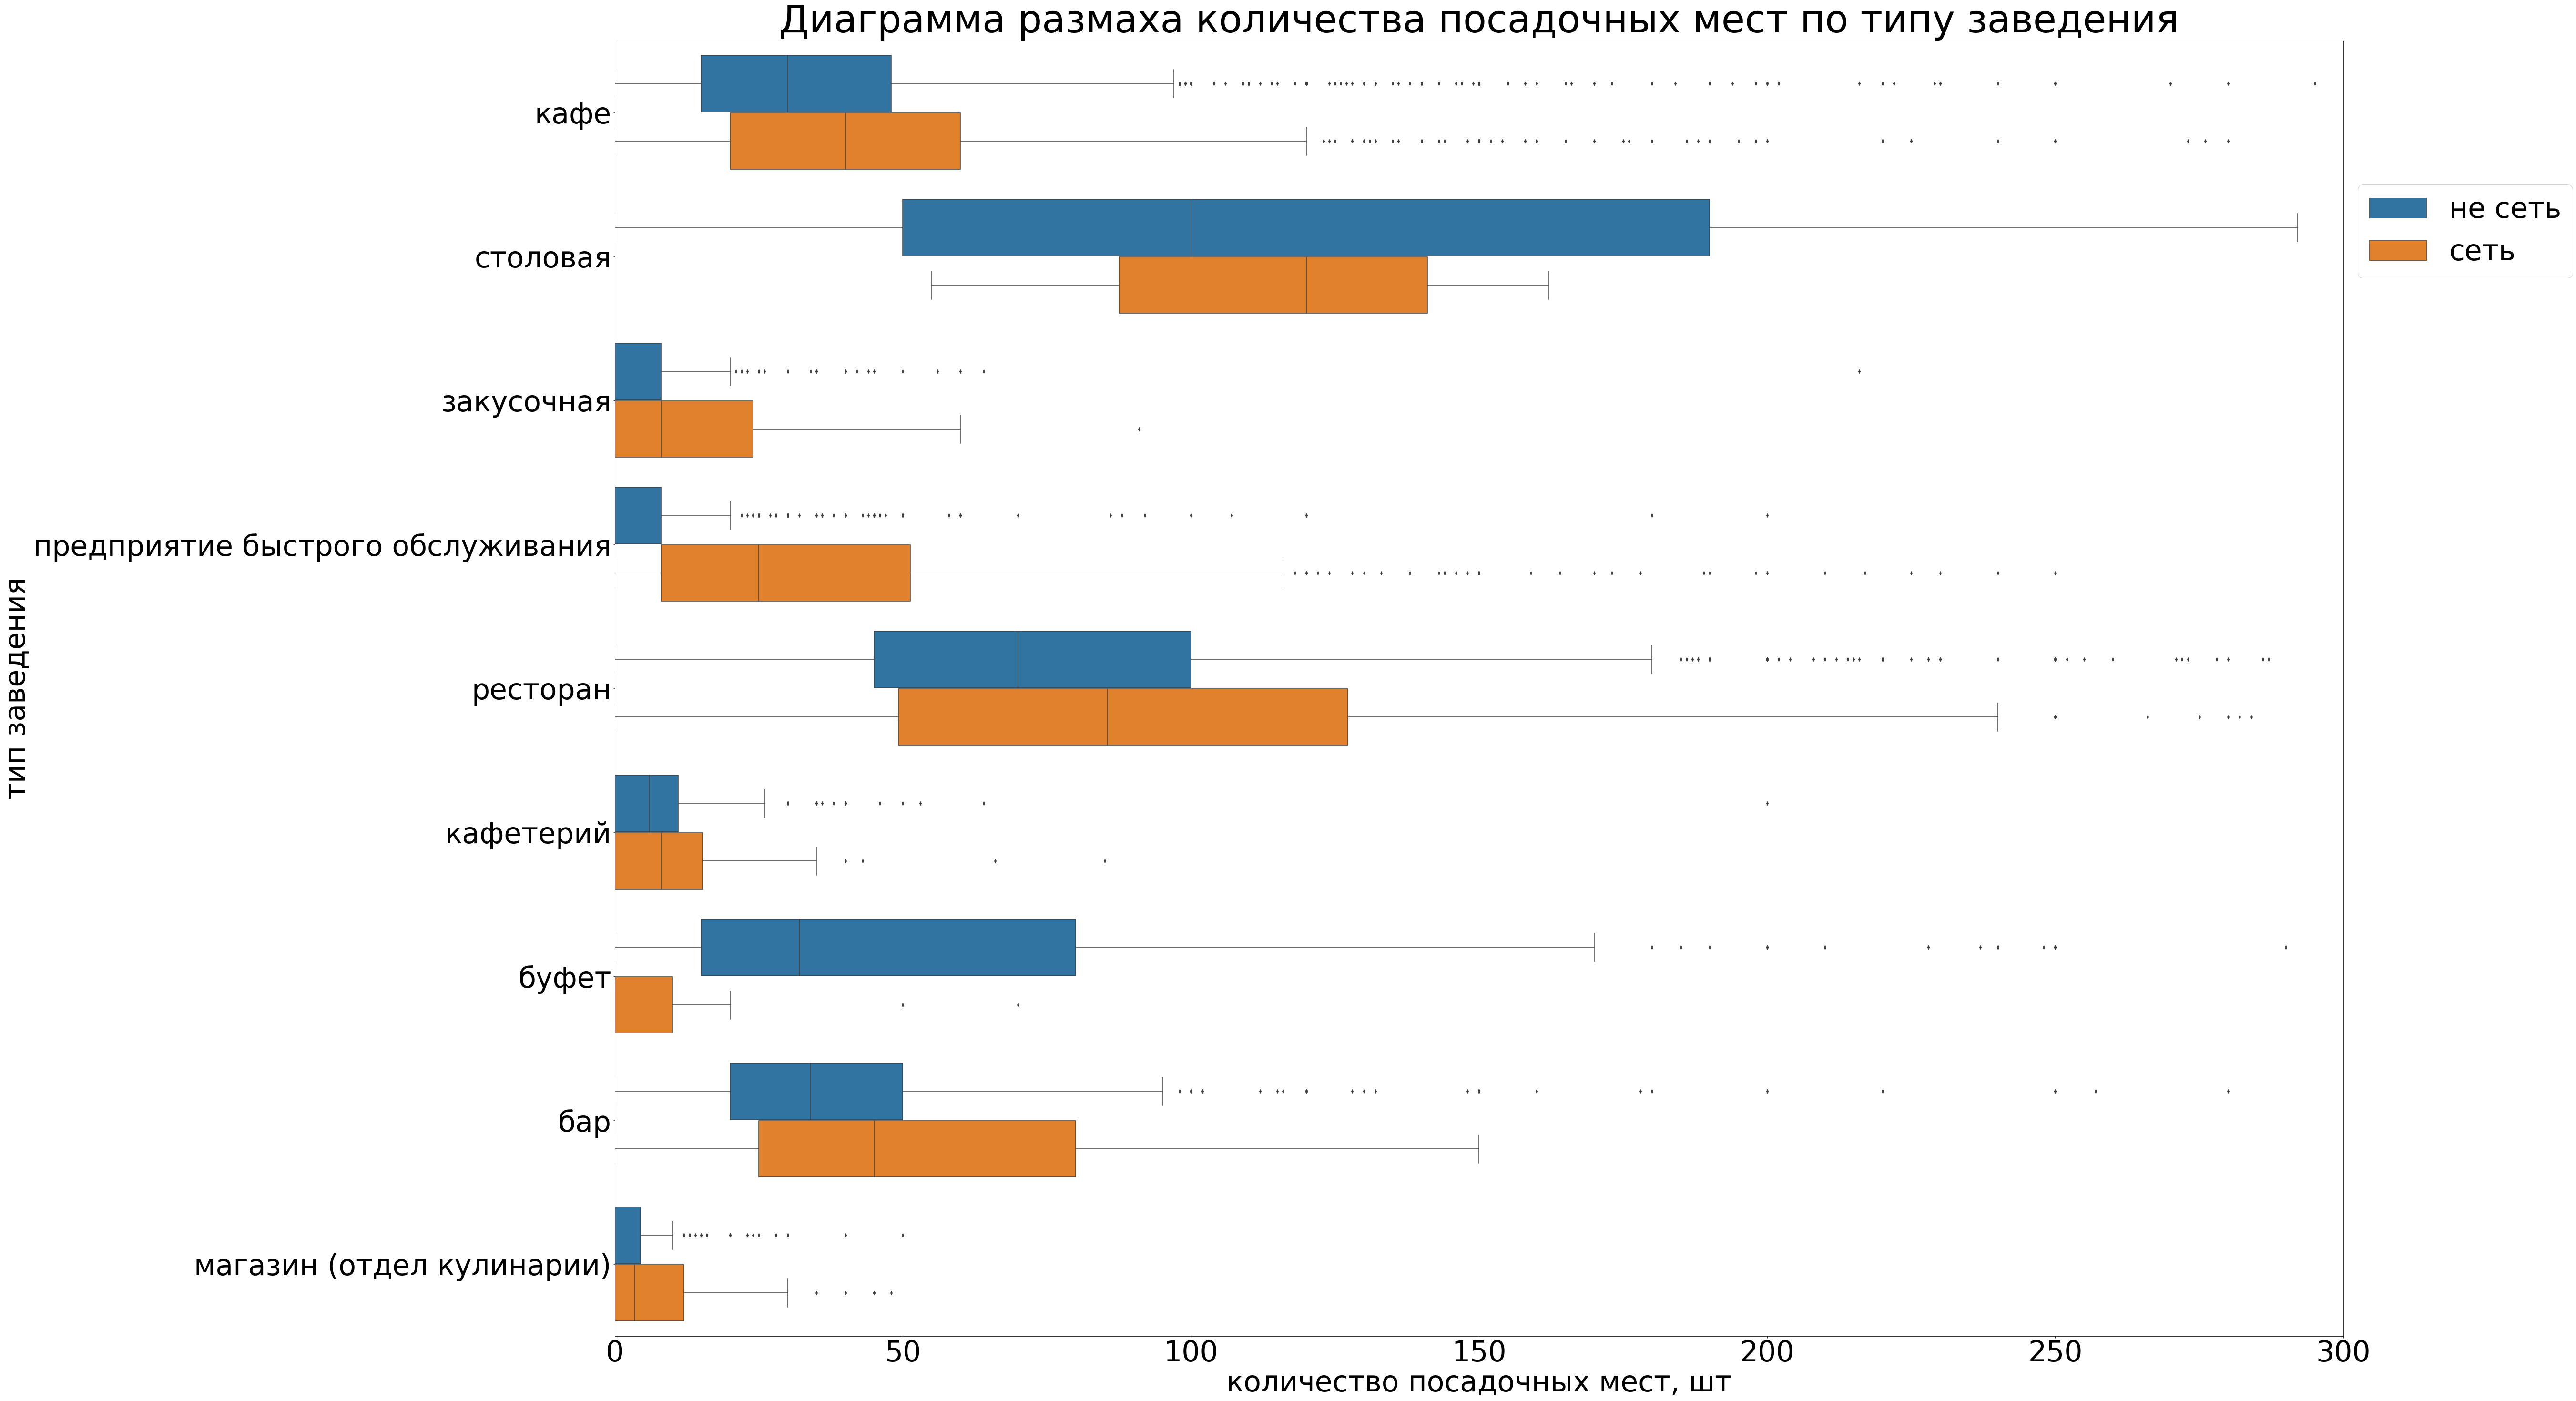

In [25]:
plt.figure(figsize=(65,50))
ax = sns.boxplot(y="object_type", x="number", hue="chain", data=rest_data)

plt.ylabel("тип заведения",fontsize = 60)
plt.xlabel("количество посадочных мест, шт",fontsize = 60)

plt.xlim(0, 300)

plt.legend(loc=2, prop={'size': 60}) 
plt.legend(bbox_to_anchor=(1,0.9))

ax.set_title('Диаграмма размаха количества посадочных мест по типу заведения',fontsize = 80)

plt.show()

**Подведем итог шестой части проекта:** сильных различий по количеству посадочных мест по классификации "сетевое/несетевое помещение" не обнаружено. Что касается кафе, то среднее количество посадочных мест по Москве - это примерно 40 мест

Размах количества посадочных мест для кафе составляет примерно от 20 до 60. Т.е. для Москвы характерно кафе с количеством посадочных мест равным 40 ±20. Исходя из последних двух разделов, будем ориентироваться на среднее значение равное около 20 мест

Для определения более точного количества посадочных мест для нашего кофе говорить пока рано. Это зависит от разных показателей - например, от конечного количества инвестиций, а также от площади заведения и проходимости улицы, где будет находиться наше помещение и пр.

Все вопросы, касаемые места нахождения нашего заведения - попробуем разобраться в следующих разделах

## Построим график топ-10 улиц по количеству объектов общественного питания и воспользовавшись внешней информацией, ответим на вопрос — в каких районах Москвы находятся эти улицы?

*Выделим в отдельный столбец информацию об улице из столбца* `address`:

In [26]:
street = rest_data['address'].apply(lambda x: pd.Series(x.split(',')))
street = street[1].to_frame()
street.columns = ['name']

street

,name
0,улица Егора Абакумова
1,улица Талалихина
2,Абельмановская улица
3,Абрамцевская улица
4,Абрамцевская улица
...,...
15361,3-й Крутицкий переулок
15362,улица Земляной Вал
15363,улица Земляной Вал
15364,поселение Московский


<br>*Выпешем топ-10 улиц  по количеству объектов общественного питания:*

In [27]:
street_10 = street.groupby('name').size().to_frame().reset_index()
street_10.columns = ['name', 'count']
famous_street = street_10.sort_values(ascending=False, by='count').reset_index(drop=True).head(10)

famous_street

,name,count
0,город Зеленоград,231
1,проспект Мира,203
2,Профсоюзная улица,181
3,Ленинградский проспект,168
4,Пресненская набережная,164
5,Варшавское шоссе,155
6,Ленинский проспект,145
7,поселение Сосенское,137
8,проспект Вернадского,126
9,Кутузовский проспект,112


<br> *Избавимся от записи о городе Зеленоград (т.к. в классификацию "улица" он не подходит):*

In [28]:
famous_street = famous_street.drop(index=[0]).reset_index(drop=True)
famous_street

,name,count
0,проспект Мира,203
1,Профсоюзная улица,181
2,Ленинградский проспект,168
3,Пресненская набережная,164
4,Варшавское шоссе,155
5,Ленинский проспект,145
6,поселение Сосенское,137
7,проспект Вернадского,126
8,Кутузовский проспект,112


<br>*Построим график, исходя из данных, полученных выше:*

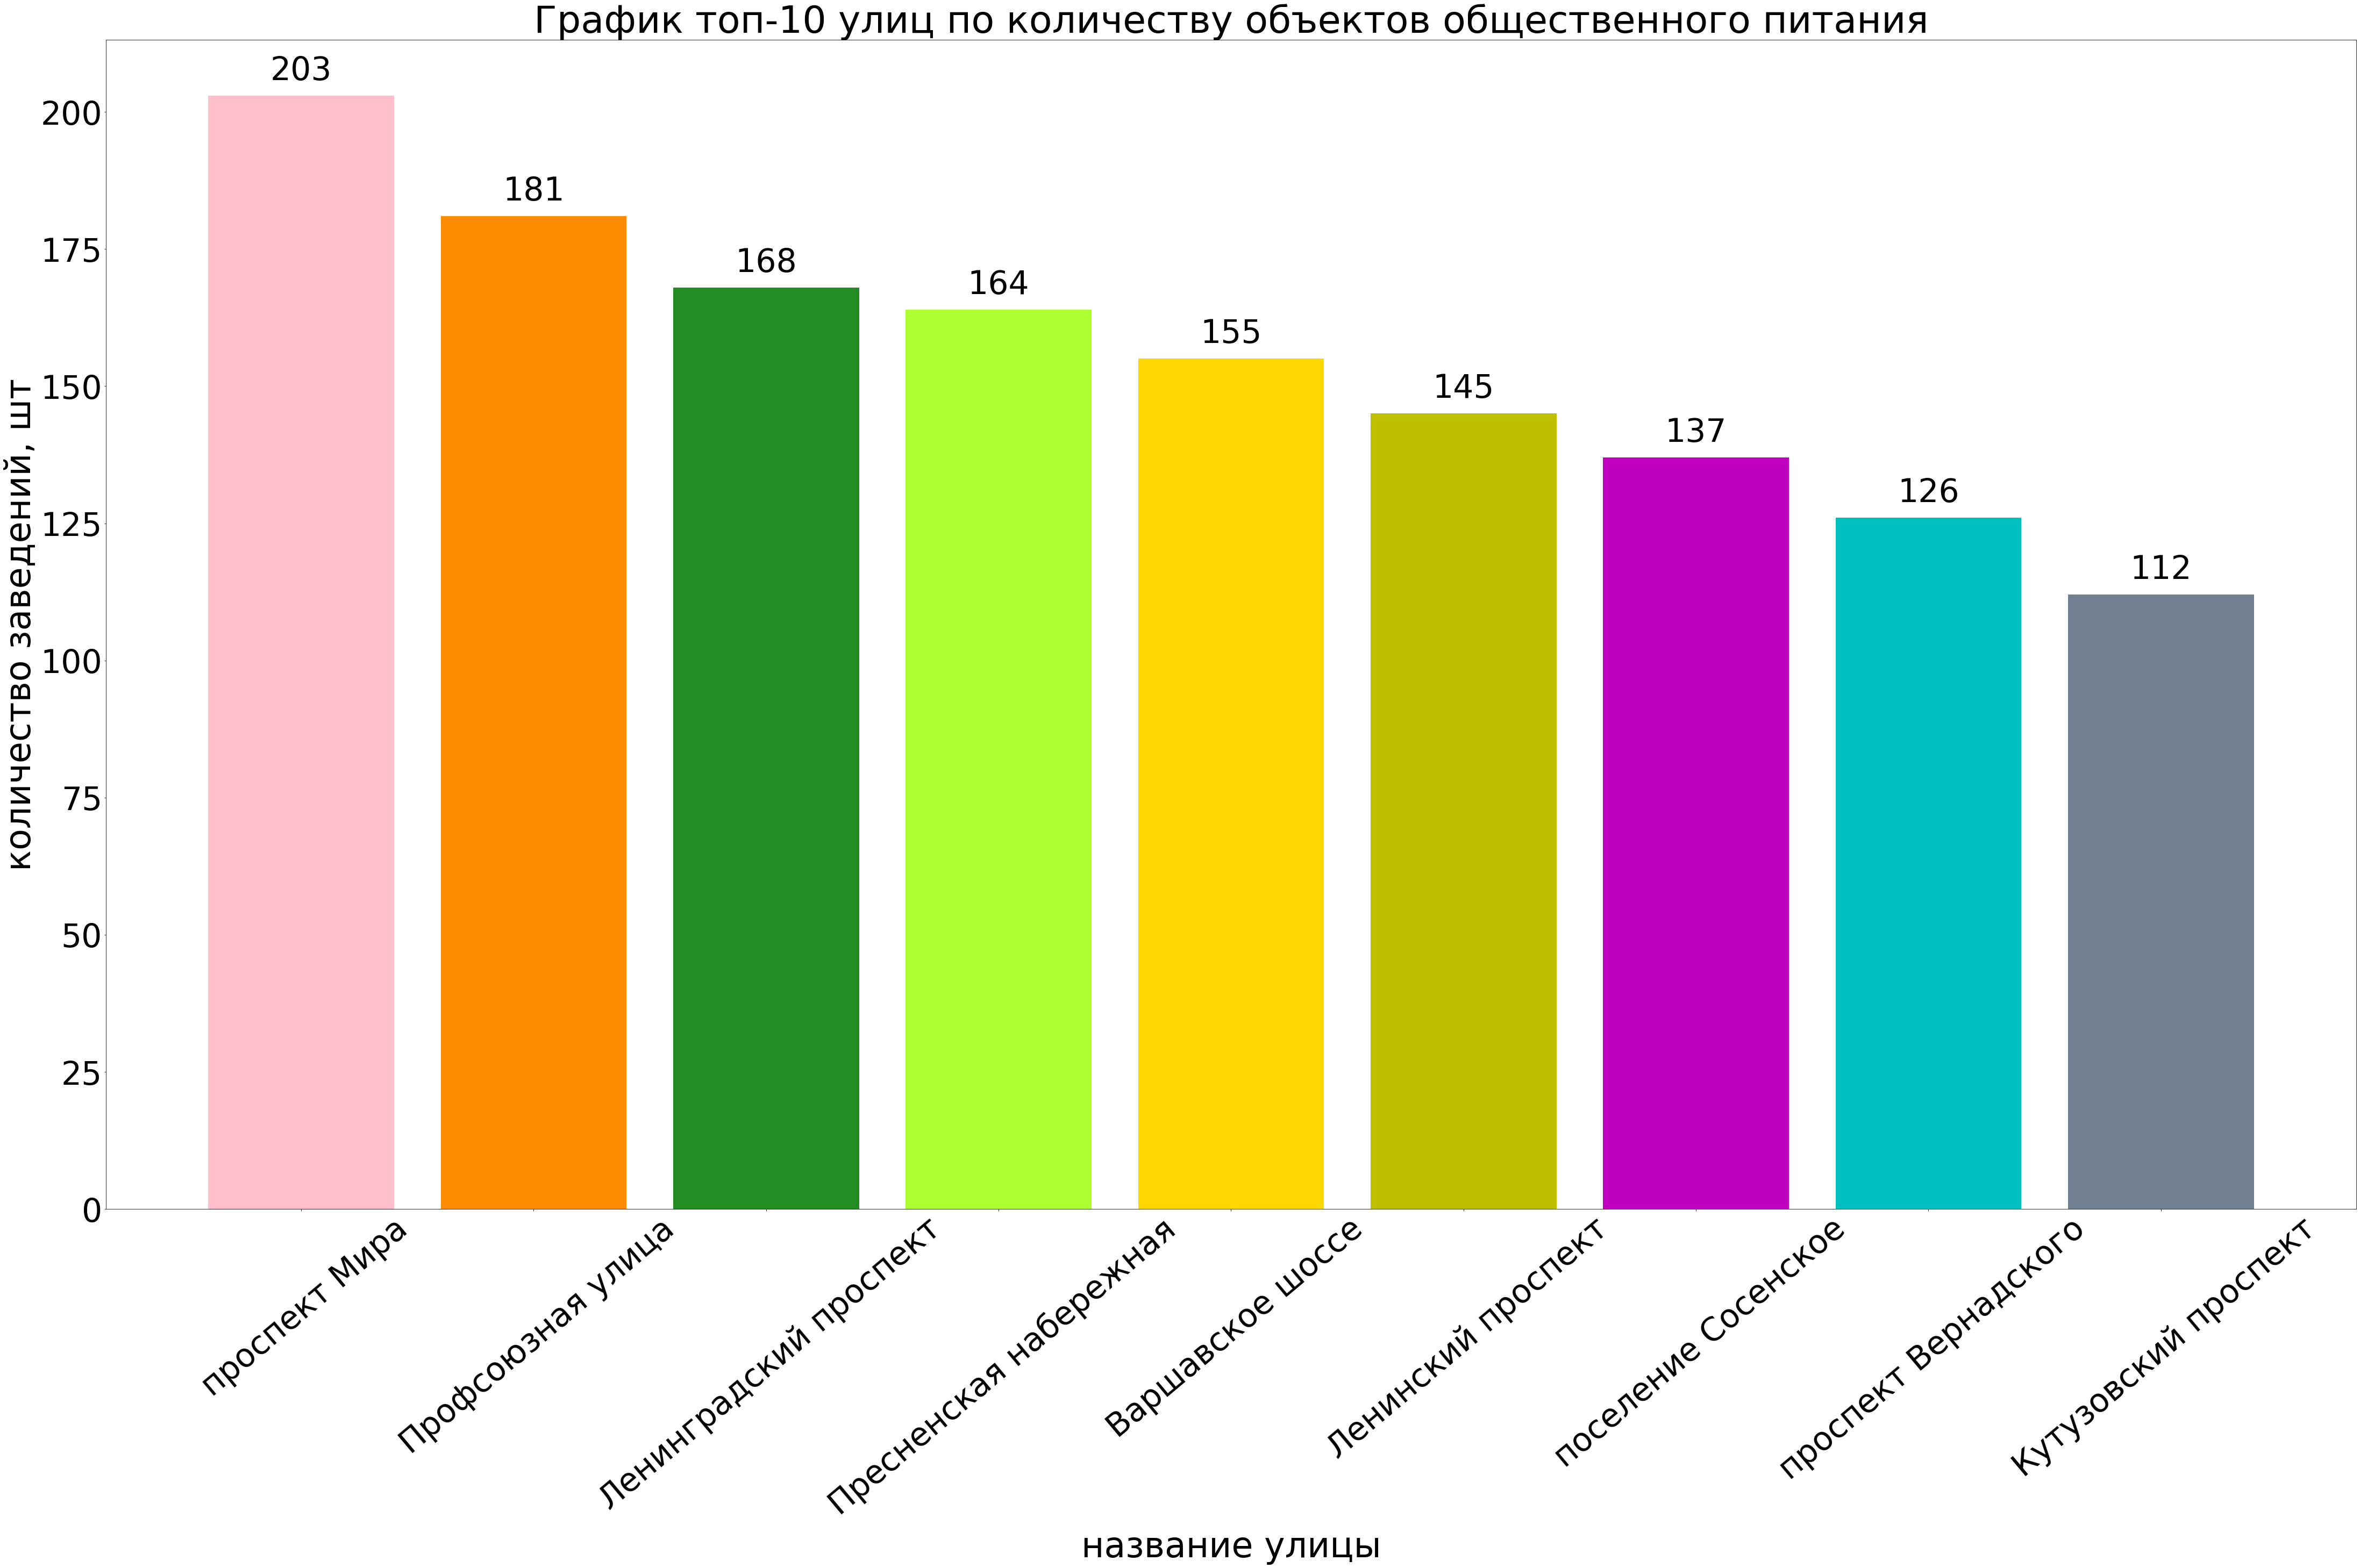

In [29]:
plt.figure(figsize=(75,40))


xs = famous_street['name']
ys = famous_street['count']



plt.bar(xs,ys, color=['pink', 'darkorange', 'forestgreen', 'greenyellow', 'gold', 'y', 'm', 'c', 'slategray', 'lightsalmon'])

plt.ylabel("количество заведений, шт",fontsize = 65)
plt.xlabel("название улицы",fontsize = 65)

plt.title('График топ-10 улиц по количеству объектов общественного питания',
          fontsize=70)

plt.yticks(fontsize = 60)
plt.xticks(fontsize = 60, rotation = 40)


# выведем значения количества улиц над соответствующими столбцами:  
for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)  
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,30),
                 ha='center')

plt.show()

In [30]:
# загрузим необходимые данные через Google Sheets:
from io import BytesIO
import requests
spreadsheet_id = '1zxzNnv_Kbf9-Ua3_JXzm81DCDICNcrpHNMPjOCwcj3I' 
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

df1 = df['Address'].apply(lambda x: pd.Series(x.split(','))) # разобьем информацию об адресе

df = df.merge(df1,  left_index = True, right_index = True) # объединяем столбец с улицей и основным дата-сетом
df = df[['District', 1]] # оставляем информацию о районе и о названии улицы

df.columns = ['district', 'name']

df = df.dropna()

df.head()

,district,name
1,район Арбат,улица Арбат
2,район Арбат,улица Арбат
3,район Арбат,Большой Николопесковский переулок
4,район Арбат,Малый Николопесковский переулок
5,район Арбат,улица Большая Молчановка


In [31]:
famous_district = famous_street.merge(df, on='name', how='left')
famous_district = famous_district['district'].value_counts()

famous_district.head(10)

район Дорогомилово          50
Нагорный район              27
район Аэропорт              27
район Чертаново Южное       21
район Чертаново Северное    18
Останкинский район          18
район Черёмушки             12
Мещанский район             10
район Нагатино-Садовники     9
Обручевский район            8
Name: district, dtype: int64

**Подведем итог седьмой части проекта:** улицы и районы, которые представлены выше - самые загруженные по количеству заведений общественного питания в Москве, поэтому нет смысла там начинать открываться из-за большого уровня конкуренции

Возможно, по причине нашего будущего расширения, стоит в дальнейшем начать прицеливаться и к этим районам, т.к. по причине высокой плотности заведений общественного питания на одну улицу из этого следует, что эти районы достаточно благоприятны для инвестиций в сферу обслуживания. Из этого следует, что там люди готовы тратить свои личные средства не только на вещи первой необходимости, но и на досуг

## Найдем число улиц с одним объектом общественного питания, воспользовавшись внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

*Выведем на экран таблицу с улицами с одним объектом общественного питания:*

In [32]:
not_famous_street = street_10[street_10['count'] == 1]
not_famous_street.head()

,name,count
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1


<br> *Выведем на экран районы, которые представлены только одним заведением общественного питания на одну улицу:*

In [33]:
not_famous_district = not_famous_street.merge(df, on='name', how='left')
not_famous_district = not_famous_district['district'].value_counts().reset_index()
not_famous_district.columns = ['name', 'count']

not_famous_district = not_famous_district.head()

not_famous_district

,name,count
0,Тверской район,138
1,район Хамовники,127
2,Таганский район,127
3,Басманный район,124
4,Пресненский район,110


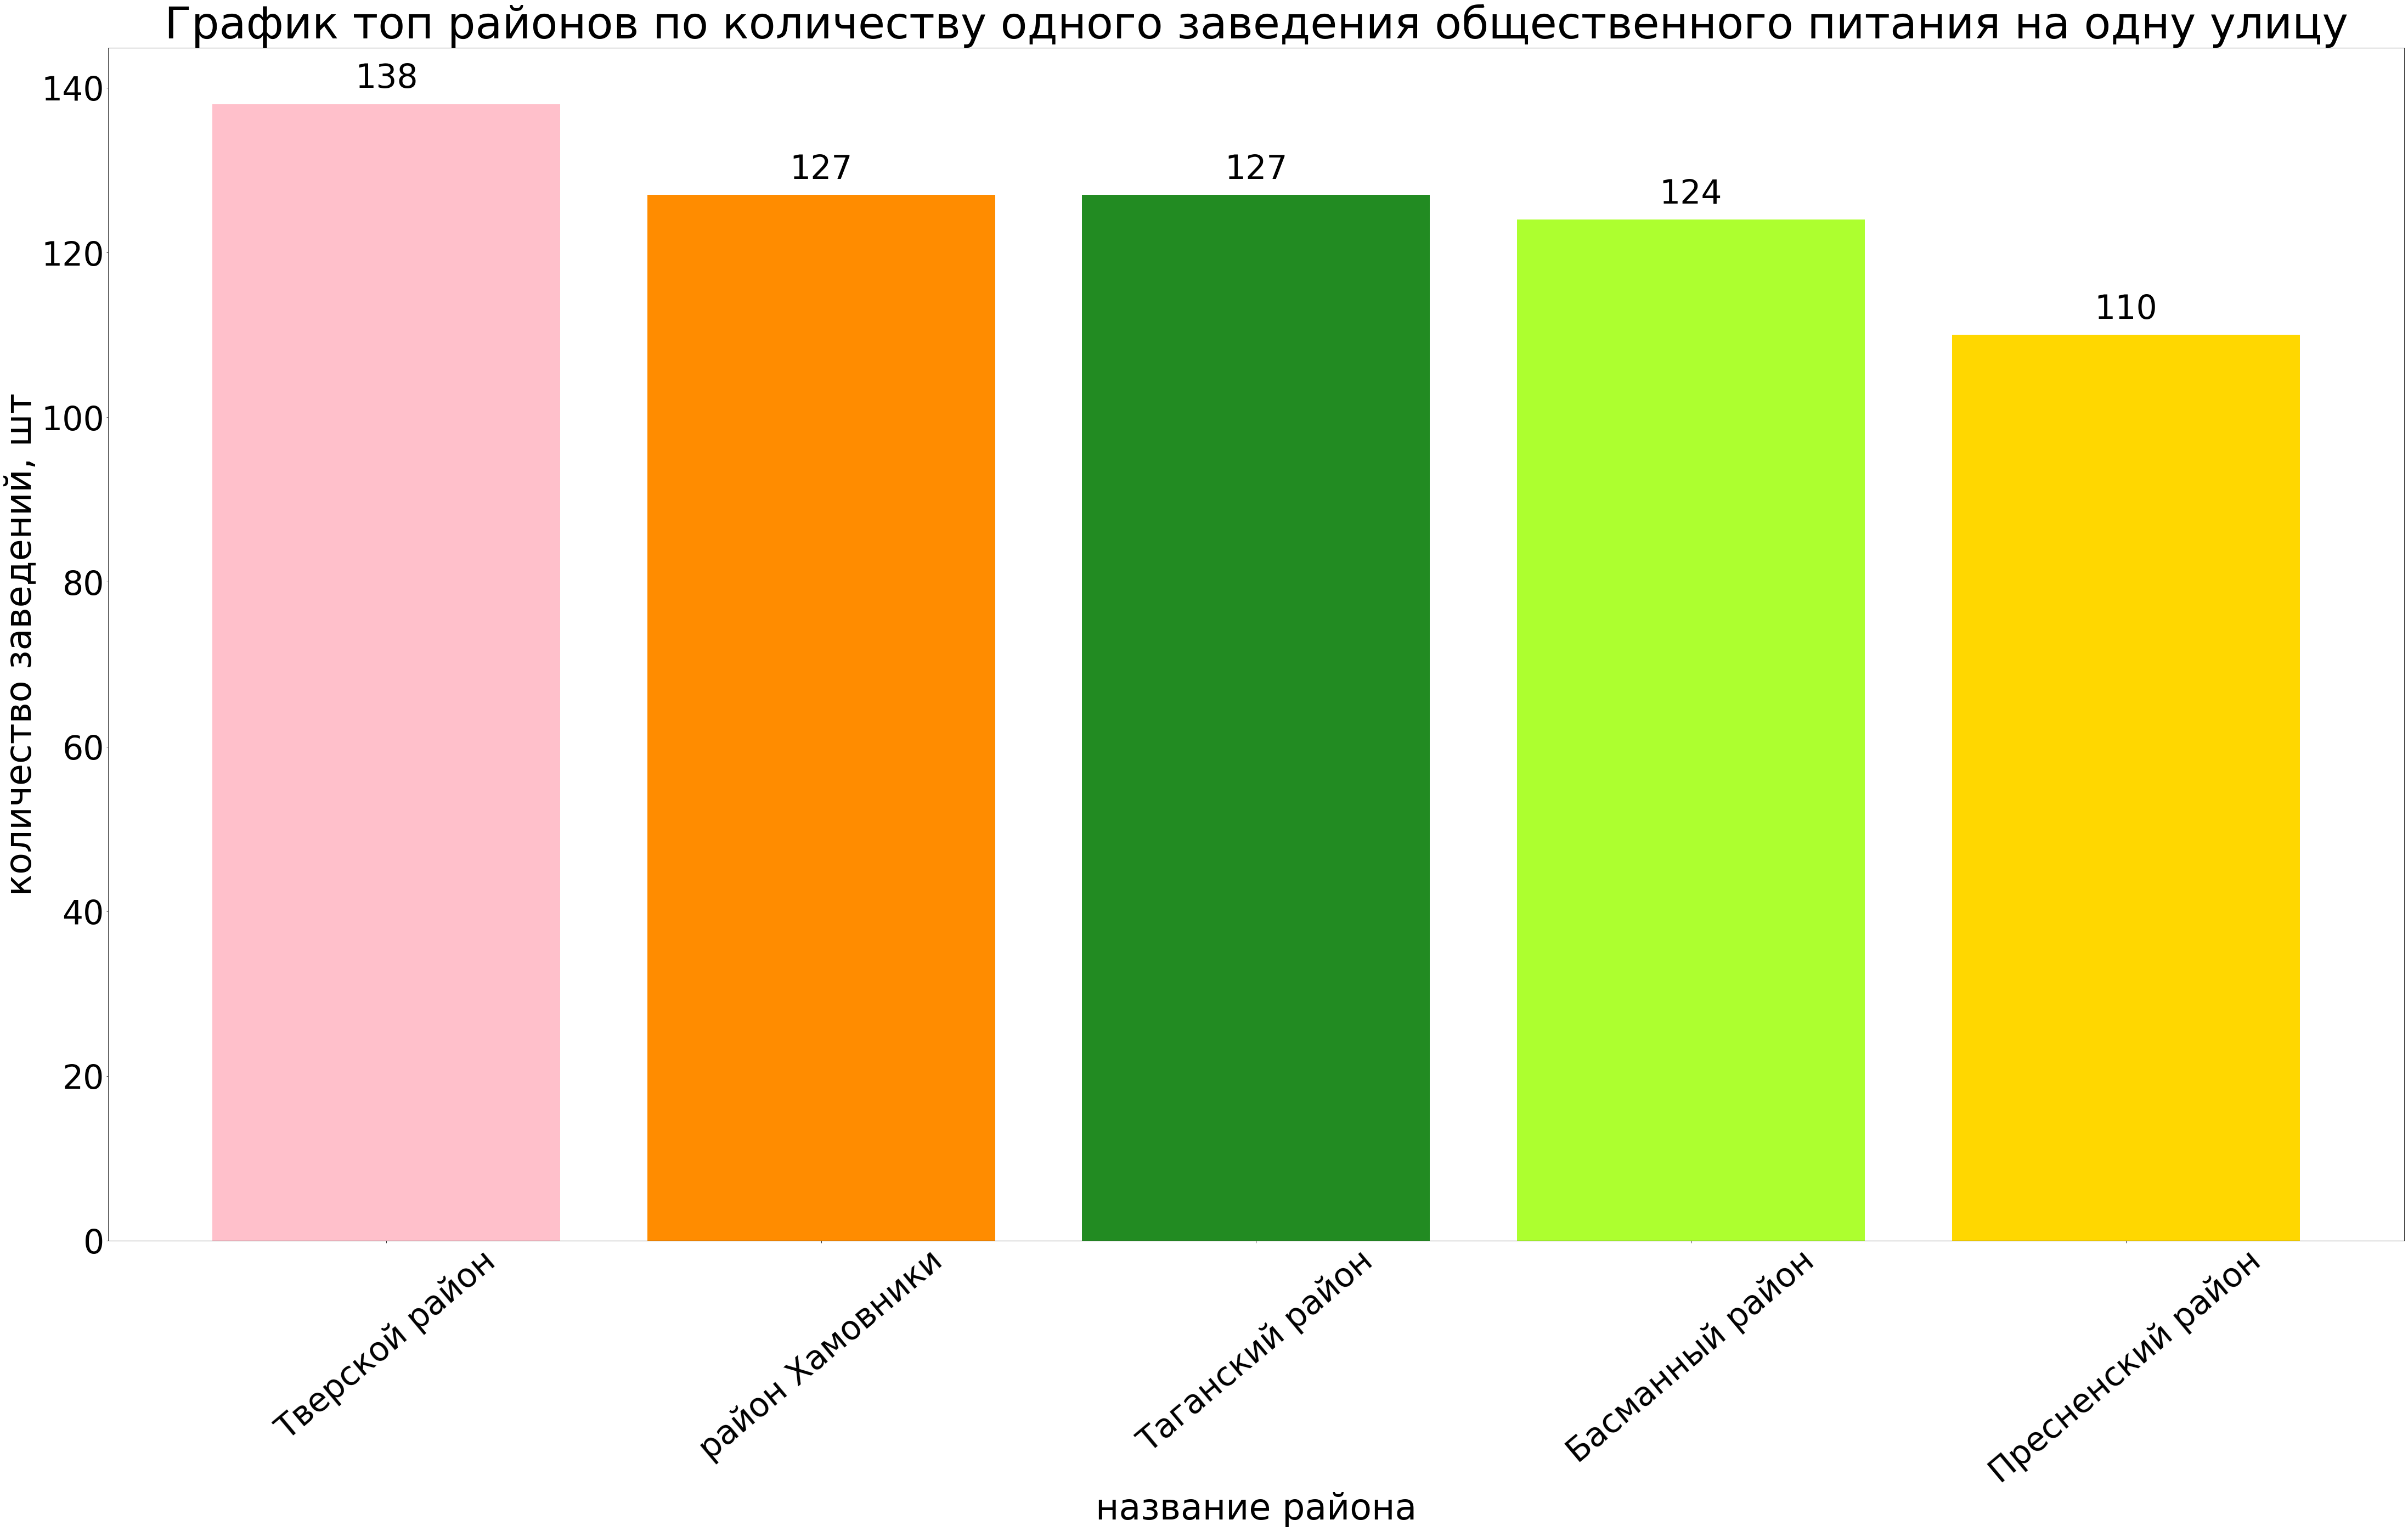

In [34]:
plt.figure(figsize=(75,40))


xs = not_famous_district['name']
ys = not_famous_district['count']



plt.bar(xs,ys, color=['pink', 'darkorange', 'forestgreen', 'greenyellow', 'gold', 'y', 'lightsalmon', 'c', 'slategray', 'lightsalmon'])

plt.ylabel("количество заведений, шт",fontsize = 65)
plt.xlabel("название района",fontsize = 65)

plt.title('График топ районов по количеству одного заведения общественного питания на одну улицу',
          fontsize=80)

plt.yticks(fontsize = 60)
plt.xticks(fontsize = 60, rotation = 40)

# выведем значения количества улиц над соответствующими столбцами:  
for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)  
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,30),
                 ha='center')


plt.show()

**Подведем итог девятой части проекта:** районы из списка выше - это те районы, где потенциально может открыться наше кафе по причине небольшого количества конкурентов на одну улицу

Казалось было бы логично открыться в том районе, где представлено наименьшее количество заведений на одну улицу. Но, во-первых, скорее всего это районы слабо благоустроены либо они спальные, во-вторых, это районах живут люди, у которых в среднем ЗП будет меньше чем в других районах, а это очень негативный фактор, так как наш средний чек в первое время будет точно выше чем в среднем по Москве (по причине дороговизны роботов)

Поэтому с целью минимизации воздействий на эти факторы, стоит все же выбрать те районы, которые представлены максимальным количеством улиц, в которых в свою очередь находится только одно заведение общественного питания. Это районы - Тверской, Хамовники, Таганский, Басманный и Пресненский

## Вывод

**Исходя из анализа выше, рекомендации о виде заведения, количестве посадочных мест, а также районе расположения следующие:**

- вид заведения: кафе (из-за  большой популярности у москвичей данного вида, средней площади заведения (по результату определения среднего количество посадочных мест и сравнения этого показателя с другими видами заведений)
- количество посадочных мест: 40 ±20;
- район: Тверской, Хамовники, Таганский, Басманный и Пресненский (представлены максимальным количеством улиц, на которых  находится только одно заведение общественного питания)

<br>

**Возможность развития сети**

*По причине следующих преимуществ по сравнению с конкурентами:*
- уникальность заведения;
- основные ожидаемые посетитители - это молодежь, которая следит за трендами и, благодаря высокому количеству нахождения ими в соцсетях, это позволит нам сэкономить деньги на маркетинг; 
- низкие затраты на роботов относительного живого персонала;
- более высокая производительность относительного живого персонала;
- отсутствие опозданий, болезней, увольнений и прочих непредвиденных обстоятельств у роботов, благодаря чему можно проводить более точное планирование и т.д.


<br><br>**Необходимые действия для нашего заведения перед его открытием**
<br><br>*После того, как мы определились с типом заведения, количеством посадочных мест и районе, в котором будет находиться наше кафе, необходимо выполнить следующее:*

- зарегистрировать заведение (создать запись в реестре, уведомление об открытии, договор аренды и пр.);
- закупить необходимое количество роботов и комплектующих к ним, отталкиваясь в первую очередь от значения количества роботов на одного посетителя;
- нанять "живых" сотрудников для поддержания работоспособного состояния роботов (механиков, айтишников), для ведения бухгалтерии, а также для охраны заведения;
- организовать планирование затрат на ближайшее время (электроэнергия, ЗП специалистов, налоги, ремонт и пр.);
- завести каналы в крупных соц.сетях (Ютуб, Вк, Инстаграмм и пр.);
- раскрутить наше заведение через рекламу в соц.сетях, радио, ТВ и пр.;
- составить бизнес-план для улучшения текущего заведения, а также будущего расширения в случае успешного старта нашего первого заведения

<br><br>**Необходимые действия для развития заведения после его успешного открытия**
<br><br>*В случае успешного старта нашего пилотного кафе с роботами необходимо выполнить следующее:*
- Определиться кто наша ЦА, чтобы выяснить, что именно этих людей заинтересовало в нашем заведении и как можно привлечь к нам и другую аудиторию; 
- Определиться с будущим районом для открытия нового заведения;
- Определиться с количеством посадочных мест в новом заведении;
- Если есть такая необходимость, можно попробовать поэксперементировать с выбором другого вида заведения общественного питания (например, ресторан или бар);
- Сотрудничать со службами доставок, если получится, то можно попробовать организовывать доставку также роботами;
- Определиться с подрядчиком, который будет на долгосрок обеспечивать нас необходимым количеством роботов и комплектующих, а также будет обеспечивать дисконт по причине больших заказов и амбиций с нашей стороны;
- Основной акцент все-таки ставить не на расширении сети и даже на получении максимальной выгоды, а на планомерном развитии нашего бизнеса в целом, т.к. нужно понимать, что наш сегмент на рынке общественного питания уникальный и все ошибки, которые будут нами совершаться, будут являться по своей природе уникальными



*Все это позволит нам в кратчайшие сроки снискать популярность на долгое время*




## Презентация

Презентация: <https://docs.google.com/presentation/d/1ue5Of9vfU6-m1o2Fl86QKxPNkRyN3unmVukEChL8yy0/edit?usp=sharing>